In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#named the dataframe df0
#will change to df after cleaning
df0 = pd.read_csv('ks-projects-201801.csv')
df0.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df0.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
#checking the data types
#should switch deadline and launched to date type
df0.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [5]:
#review data information
#identified some null values in columns; "name" and "usd pledged"
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
#double check by only looking at null values
df0.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
#"usd pledged" column is the same as usd_pledged_real, should drop for redundancy
#difference is in who did the conversions, and the conversion amounts themselves are different as well
#"usd pledged" was converted by kickstarter and usd_pledged_real was converted by Fixer.io API
#after some research, the conversions for usd_pledged_real seem to be much more consistently accurate
#decided to drop column "usd pledged" and keep usd_pledged_real
df0.drop(['usd pledged'], axis=1, inplace=True)
df0.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00


In [8]:
#checking NaNs in name column
df0.name.isna().sum()

4

In [9]:
#check the specific rows with NaNs
df0[df0.isna().any(axis=1)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,35000.00


In [10]:
#remove any rows if NaN is present
df0 = df0.dropna()

In [11]:
#confirm rows with NaN values from name have been dropped
df0.name.isna().sum()

0

In [12]:
#confirm there are no more NaN values
df0.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [13]:
#confirm once more with entire dataframe
#new total amount of rows in dataframe: 378657
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378657 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378657 non-null  object 
 3   main_category     378657 non-null  object 
 4   currency          378657 non-null  object 
 5   deadline          378657 non-null  object 
 6   goal              378657 non-null  float64
 7   launched          378657 non-null  object 
 8   pledged           378657 non-null  float64
 9   state             378657 non-null  object 
 10  backers           378657 non-null  int64  
 11  country           378657 non-null  object 
 12  usd_pledged_real  378657 non-null  float64
 13  usd_goal_real     378657 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 43.3+ MB


In [14]:
#name should be changed to project_name
#project_name is a clearer way to describe this column
#taking into account the possibility that we might want to add a name column in the future (like a person's name)
df0 = df0.rename(columns={'name': 'project_name'})

In [15]:
#category should be changed to subcategory
df0 = df0.rename(columns={'category': 'sub_category'})

In [16]:
#following the same logic as the name/project_name column
#changing state column to project_result
df0 = df0.rename(columns={'state': 'project_result'})

In [17]:
#changing launched and deadline data type to datetime
df0['launched'] = pd.to_datetime(df0['launched'])
df0['deadline'] = pd.to_datetime(df0['deadline'])

In [18]:
#want to make a column depicting the length of project in days
df0['length_of_project_days'] = (df0['deadline'] - df0['launched']).dt.days
df0.head()

,ID,project_name,sub_category,main_category,currency,deadline,goal,launched,pledged,project_result,backers,country,usd_pledged_real,usd_goal_real,length_of_project_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,55


In [19]:
#making 3 more columns separating year, month, and day from the launched datetime column
#can possibly make our analysis more dynamic, can gain more insights into specific years, or months/days of the year
df0['year_launched'] = df0['launched'].dt.year
df0['month_launched'] = df0['launched'].dt.month
df0['day_launched'] = df0['launched'].dt.dayofweek
df0.head()

,ID,project_name,sub_category,main_category,currency,deadline,goal,launched,pledged,project_result,backers,country,usd_pledged_real,usd_goal_real,length_of_project_days,year_launched,month_launched,day_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,58,2015,8,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,59,2017,9,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,44,2013,1,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,29,2012,3,5
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,55,2015,7,5


In [20]:
#month mapping
month_mapping = {1: 'January',
                 2: 'February',
                 3: 'March',
                 4: 'April',
                 5: 'May',
                 6: 'June',
                 7: 'July',
                 8: 'August',
                 9: 'September',
                10: 'October',
                11: 'November',
                12: 'December',}

df0['month_launched'] = df0['month_launched'].map(month_mapping)
df0.head()

,ID,project_name,sub_category,main_category,currency,deadline,goal,launched,pledged,project_result,backers,country,usd_pledged_real,usd_goal_real,length_of_project_days,year_launched,month_launched,day_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,58,2015,August,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,59,2017,September,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,44,2013,January,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,29,2012,March,5
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,55,2015,July,5


In [21]:
#day of week mapping
dow_mapping = {0: 'Monday',
               1: 'Tuesday',
               2: 'Wednesday',
               3: 'Thursday',
               4: 'Friday',
               5: 'Saturday',
               6: 'Sunday',
                }

df0['day_launched'] = df0['day_launched'].map(dow_mapping)
df0.head()

,ID,project_name,sub_category,main_category,currency,deadline,goal,launched,pledged,project_result,backers,country,usd_pledged_real,usd_goal_real,length_of_project_days,year_launched,month_launched,day_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,58,2015,August,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,59,2017,September,Saturday
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,44,2013,January,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,29,2012,March,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,55,2015,July,Saturday


In [22]:
#extract the time from launched by "rounding down" to midnight
#follows deadline column's pattern, so it's more consistent and cleaner
df0['launched'] = df0['launched'].dt.floor('D')

In [23]:
#reordering the columns so it's more organized and easier to read
df0[['ID', 'project_name', 'main_category', 'sub_category', 'country', 'currency', 'goal',
'pledged', 'usd_goal_real', 'usd_pledged_real', 'backers', 'project_result', 
'launched', 'deadline', 'length_of_project_days', 
'year_launched', 'month_launched', 'day_launched']].head()

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,GBP,1000.0,0.0,1533.95,0.0,0,failed,2015-08-11,2015-10-09,58,2015,August,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,Narrative Film,US,USD,30000.0,2421.0,30000.00,2421.0,15,failed,2017-09-02,2017-11-01,59,2017,September,Saturday
2,1000004038,Where is Hank?,Film & Video,Narrative Film,US,USD,45000.0,220.0,45000.00,220.0,3,failed,2013-01-12,2013-02-26,44,2013,January,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,USD,5000.0,1.0,5000.00,1.0,1,failed,2012-03-17,2012-04-16,29,2012,March,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,USD,19500.0,1283.0,19500.00,1283.0,14,canceled,2015-07-04,2015-08-29,55,2015,July,Saturday


In [24]:
#now it has to be saved to a new variable, df
df = df0[['ID', 'project_name', 'main_category', 'sub_category', 'country', 'currency', 'goal',
'pledged', 'usd_goal_real', 'usd_pledged_real', 'backers', 'project_result', 
'launched', 'deadline', 'length_of_project_days', 
'year_launched', 'month_launched', 'day_launched']]
df.head()

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,GBP,1000.0,0.0,1533.95,0.0,0,failed,2015-08-11,2015-10-09,58,2015,August,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,Narrative Film,US,USD,30000.0,2421.0,30000.00,2421.0,15,failed,2017-09-02,2017-11-01,59,2017,September,Saturday
2,1000004038,Where is Hank?,Film & Video,Narrative Film,US,USD,45000.0,220.0,45000.00,220.0,3,failed,2013-01-12,2013-02-26,44,2013,January,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,USD,5000.0,1.0,5000.00,1.0,1,failed,2012-03-17,2012-04-16,29,2012,March,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,USD,19500.0,1283.0,19500.00,1283.0,14,canceled,2015-07-04,2015-08-29,55,2015,July,Saturday


In [25]:
#confirming the unique identifier, our primary key. 
#378657 total rows in dataframe, as mentioned before.
df.ID.value_counts()

1000002330    1
353954290     1
353983602     1
353977728     1
353977159     1
             ..
1640751039    1
1640727920    1
1640723654    1
1640721026    1
999988282     1
Name: ID, Length: 378657, dtype: int64

In [26]:
#mispellings here will be ignored since these were made by the creator of the project
#in other words, it is simply the original spelling of the project's name, whether intentional or not
df.project_name.value_counts()

New EP/Music Development                                       41
Canceled (Canceled)                                            13
N/A (Canceled)                                                 11
Music Video                                                    11
Cancelled (Canceled)                                           10
                                                               ..
Urbex : Le Projet Secret (Film)                                 1
Help VITA to record new album to come back his girl!            1
Launch children's book, Magic, Giggles & Love in hard cover     1
Varanasi Silks                                                  1
Nou Renmen Ayiti!  We Love Haiti!                               1
Name: project_name, Length: 375764, dtype: int64

In [27]:
#no issues with main_category
df.main_category.value_counts()

Film & Video    63584
Music           51918
Publishing      39874
Games           35230
Technology      32569
Design          30069
Art             28152
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [28]:
#need to filter values in separate parts to be able to search for misspellings/errors
df.sub_category.value_counts()

Product Design     22313
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: sub_category, Length: 159, dtype: int64

In [29]:
df.sub_category.describe()

count             378657
unique               159
top       Product Design
freq               22313
Name: sub_category, dtype: object

In [30]:
#filter out with counts less than 1500
#will filter most frequent subcategories as priority
#Webseries should be changed to Web Series
threshold = 1500
filtered_counts = df['sub_category'].value_counts()
filtered_counts1 = filtered_counts[filtered_counts >= threshold]

filtered_counts1

Product Design    22313
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
                  ...  
Small Batch        1808
Mobile Games       1789
Food Trucks        1752
Journalism         1747
Photobooks         1580
Name: sub_category, Length: 61, dtype: int64

In [31]:
#Webseries --> Web Series
df['sub_category'] = df['sub_category'].str.replace('Webseries','Web Series')

In [32]:
#check, should be 5148 counts
df[df["sub_category"] == 'Web Series']['sub_category'].value_counts()

Web Series    5762
Name: sub_category, dtype: int64

In [33]:
#check the range inbetween 500 and 1500
lower_bound = 500
upper_bound = 1500

filtered_counts = df['sub_category'].value_counts()
filtered_counts2 = filtered_counts[(filtered_counts > lower_bound) & (filtered_counts < upper_bound)]

filtered_counts2


Plays               1378
Poetry              1369
Digital Art         1346
Horror              1287
Periodicals         1265
Jewelry             1239
Wearables           1233
DIY                 1173
Woodworking         1167
Farms               1154
People              1103
Faith               1092
Live Games          1050
Conceptual Art      1030
Television          1015
Performances        1013
Footwear             931
Experimental         924
Radio & Podcasts     923
Academic             916
Musical              913
DIY Electronics      902
Ready-to-wear        864
Spaces               841
Festivals            839
Young Adult          821
Events               818
Anthologies          784
Fine Art             776
Architecture         760
Thrillers            746
Science Fiction      744
Action               740
Places               739
Print                727
Metal                717
Music Videos         709
3D Printing          683
Sound                669
Webcomics            648


In [34]:
#should change Childrenswear to Children's Wear
threshold = 500
filtered_counts = df['sub_category'].value_counts()
filtered_counts3 = filtered_counts[filtered_counts <= threshold]

filtered_counts3

Childrenswear         483
Installations         482
R&B                   458
Candles               429
Video                 428
Gaming Hardware       428
Flight                426
Farmer's Markets      424
Camera Equipment      416
Audio                 410
Interactive Design    398
Zines                 391
Fantasy               345
Family                336
Immersive             330
Calendars             329
Space Exploration     323
Punk                  317
Ceramics              305
Community Gardens     298
Civic Design          289
Kids                  285
Literary Journals     278
Textiles              276
Couture               275
Blues                 268
Animals               255
Fabrication Tools     250
Makerspaces           238
Printing              238
Movie Theaters        232
Puzzles               231
Bacon                 221
Stationery            219
Photo                 196
Video Art             194
Romance               190
Knitting              181
Workshops   

In [35]:
#Childrenswear --> Children's Wear
df['sub_category'] = df['sub_category'].str.replace('Childrenswear',"Children's Wear")

In [36]:
#check, should be 418 counts
df[df["sub_category"] == "Children's Wear"]['sub_category'].value_counts()

Children's Wear    483
Name: sub_category, dtype: int64

In [37]:
#there is a strange value of N,0" present
#N,0" is determined to not be associated with any actual meaning

#in addition, these abbreviations are the alpha 2 code for each country
#but some of these can be misleading and hard to read/memorize
#will change to the country's name

#US = United States
#GB = United Kingdom
#CA = Canada
#AU = Australia
#DE = Germany
#FR = France
#IT = Italy
#NL = Netherlands
#ES = Spain
#SE = Sweden
#MX = Mexico
#NZ = New Zealand
#DK = Denmark
#IE = Ireland
#CH = Switzerland
#NO = Norway
#HK = Hong Kong
#BE = Belgium
#AT = Austria
#SG = Singapore
#LU = Luxembourg
#JP = Japan
df.country.value_counts()

US      292624
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [38]:
df.replace({'country': {    

'US': 'United States',
'GB': 'United Kingdom',
'CA': 'Canada',
'AU': 'Australia',
'DE': 'Germany',
'FR': 'France',
'IT': 'Italy',
'NL': 'Netherlands',
'ES': 'Spain',
'SE': 'Sweden',
'MX': 'Mexico',
'NZ': 'New Zealand',
'DK': 'Denmark',
'IE': 'Ireland',
'CH': 'Switzerland',
'NO': 'Norway',
'HK': 'Hong Kong',
'BE': 'Belgium',
'AT': 'Austria',
'SG': 'Singapore',
'LU': 'Luxembourg',
'JP': 'Japan'
    
}}, inplace=True)
df.head()

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,United Kingdom,GBP,1000.0,0.0,1533.95,0.0,0,failed,2015-08-11,2015-10-09,58,2015,August,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,Narrative Film,United States,USD,30000.0,2421.0,30000.00,2421.0,15,failed,2017-09-02,2017-11-01,59,2017,September,Saturday
2,1000004038,Where is Hank?,Film & Video,Narrative Film,United States,USD,45000.0,220.0,45000.00,220.0,3,failed,2013-01-12,2013-02-26,44,2013,January,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,United States,USD,5000.0,1.0,5000.00,1.0,1,failed,2012-03-17,2012-04-16,29,2012,March,Saturday
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,United States,USD,19500.0,1283.0,19500.00,1283.0,14,canceled,2015-07-04,2015-08-29,55,2015,July,Saturday


In [39]:
#can possibly replace "N,0"" with the corresponding currency. I,e AUD --> Australia
#one issue in the way is the currency "EUR" which can be many different countries
#could possibly still find out the country based on the language in the project_name category
#but some countries have the same language
#as much as I want to solve this, the issue must be dropped

#first, locate and inspect
df.loc[df["country"] == 'N,0"']

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,"N,0""",USD,6500.0,555.00,6500.00,555.00,0,undefined,2014-08-06,2014-09-20,44,2014,August,Wednesday
328,100149523,Duncan Woods - Chameleon EP,Music,Music,"N,0""",AUD,4500.0,4767.00,3211.53,3402.08,0,undefined,2015-08-04,2015-08-25,20,2015,August,Tuesday
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,"N,0""",USD,3500.0,3576.00,3500.00,3576.00,0,undefined,2015-03-10,2015-04-09,29,2015,March,Tuesday
647,1003130892,Butter Side Down Debut Album,Music,Music,"N,0""",USD,6000.0,7007.80,6000.00,7007.80,0,undefined,2015-11-02,2015-11-26,23,2015,November,Monday
749,1003629045,Chase Goehring debut EP,Music,Music,"N,0""",USD,3000.0,3660.38,3000.00,3660.38,0,undefined,2016-02-23,2016-03-21,26,2016,February,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,"N,0""",USD,7500.0,10.00,7500.00,10.00,0,undefined,2014-12-05,2015-02-03,59,2014,December,Friday
378303,998319149,Emily 2050 - Short Film,Film & Video,Film & Video,"N,0""",CAD,3000.0,3102.00,2752.04,2845.61,0,undefined,2014-04-08,2014-05-23,44,2014,April,Tuesday
378434,9988744,Matthew Stephens Music,Music,Music,"N,0""",USD,5000.0,235.00,5000.00,235.00,0,undefined,2016-01-06,2016-02-05,29,2016,January,Wednesday
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,"N,0""",GBP,2000.0,2125.00,3080.81,3273.36,0,undefined,2015-09-21,2015-10-19,27,2015,September,Monday


In [40]:
#drop all rows that contain N,0"
df = df[(df['country'] != 'N,0"')]

In [41]:
#confirm the drop
df.loc[df["country"] == 'N,0"']

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched


In [42]:
#no anomalies in currency
#will keep abbreviations since this is the traditional way to express currency and it's also not as important 

#USD = US Dollar
#GBP = British Pound
#EUR = Euro
#CAD = Canadian Dollar
#AUD = Australian Dollar
#SEK = Swedish Krona
#MXN = Mexican Peso
#NZD = New Zealand Dollar
#DKK = Danish Krone
#CHF = Swiss Franc
#NOK = Norwegian Krone
#HKD = Hong Kong Dollar
#SGD = Singapore Dollar
#JPY = Japanese Yen

df.currency.value_counts()

USD    292624
GBP     33671
EUR     17219
CAD     14756
AUD      7839
SEK      1757
MXN      1752
NZD      1447
DKK      1113
CHF       761
NOK       708
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [43]:
df.goal.value_counts()

5000.0     29180
10000.0    25980
1000.0     16876
3000.0     15348
2000.0     14903
           ...  
5673.0         1
2537.0         1
12265.0        1
68400.0        1
28559.0        1
Name: goal, Length: 8312, dtype: int64

In [44]:
#confirming no negative values
df[df["goal"] < 0]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched


In [45]:
df.pledged.value_counts()

0.00         51808
1.00          9023
10.00         4982
25.00         3958
50.00         3594
             ...  
17489.69         1
208853.02        1
21479.70         1
28938.71         1
1732.02          1
Name: pledged, Length: 61936, dtype: int64

In [46]:
#confirming no negative values
df[df["pledged"] < 0]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched


In [47]:
df.usd_goal_real.value_counts()

5000.00     23720
10000.00    20785
1000.00     13028
3000.00     12402
2000.00     11668
            ...  
201.00          1
318.52          1
36317.76        1
1246.14         1
25566.05        1
Name: usd_goal_real, Length: 50032, dtype: int64

In [48]:
#confirming no negative values
df[df["usd_goal_real"] < 0]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched


In [49]:
df.usd_pledged_real.value_counts()

0.00        51808
1.00         6557
10.00        3605
25.00        3423
50.00        2915
            ...  
305.31          1
2275.41         1
38310.39        1
37605.00        1
2875.83         1
Name: usd_pledged_real, Length: 105383, dtype: int64

In [50]:
#confirming no negative values
df[df["usd_pledged_real"] < 0]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched


In [51]:
df.backers.value_counts()

0       51811
1       34868
2       23196
3       16063
4       12068
        ...  
4100        1
2567        1
2518        1
2490        1
2314        1
Name: backers, Length: 3963, dtype: int64

In [52]:
#confirming no negative values
df[df["backers"] < 0]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched


In [53]:
#attribute "canceled" is mispelled, must change to "cancelled"

#should drop live, undefined, suspended

#after thinking about it, how are cancelled and suspended actually defined?
#might change cancelled and suspended values to failed, prefer to have this as a binary column

#suspended could be more ambiguous

#upon further research, according to kickstarter website, when a project is suspended,-->
#it is not reversible, in other words; cancelled
#if a project is cancelled or suspended, it should be defined as a failed project
df.project_result.value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: project_result, dtype: int64

In [54]:
#in order to make a decision, I must define what is successful and what is failed
#successful: has met or exceeded goal amount
#failed: has not met nor exceeded goal amount
#first, will check all "canceled" values

#according to my definitions, these projects are both cancelled and successful
#it cannot be both definitions at once
df[(df['project_result'] == 'canceled') & (df['usd_pledged_real'] == df['usd_goal_real'])]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
7102,1036055682,Namespace (Canceled),Games,Mobile Games,United Kingdom,GBP,100.0,100.0,148.53,148.53,17,canceled,2015-02-08,2015-03-18,37,2015,February,Sunday
55404,1281893787,Break Forth Podcast Startup (Canceled),Journalism,Audio,United States,USD,200.0,200.0,200.00,200.00,1,canceled,2015-06-01,2015-06-29,27,2015,June,Monday
57055,1290363545,My family are vegans and I need meat (Canceled),Food,Bacon,Australia,AUD,20.0,20.0,14.28,14.28,1,canceled,2015-10-14,2015-11-13,29,2015,October,Wednesday
62499,1317703445,City Lyfe - PepC (Canceled),Music,Pop,United States,USD,20.0,20.0,20.00,20.00,1,canceled,2014-07-12,2014-07-19,6,2014,July,Saturday
73223,1372844111,TEACH YOUR CHILD TO READ AT TWO AND THINK STRO...,Publishing,Publishing,United States,USD,250.0,250.0,250.00,250.00,1,canceled,2016-12-06,2017-01-15,39,2016,December,Tuesday
76026,1387139468,Jess and Demi's Adventures (Canceled),Photography,Places,Australia,AUD,100.0,100.0,81.43,81.43,1,canceled,2014-11-06,2015-01-05,59,2014,November,Thursday
78364,1398559540,Belle Isle: documenting Detroit's crown jewel ...,Film & Video,Film & Video,United States,USD,950.0,950.0,950.00,950.00,6,canceled,2011-03-03,2011-04-04,31,2011,March,Thursday
91019,146260203,Pure Canadian Maple Syrup Mayo (Canceled),Food,Food,Canada,CAD,20.0,20.0,16.64,16.64,1,canceled,2015-03-27,2015-04-26,29,2015,March,Friday
92410,1469617209,RUN (Canceled),Film & Video,Animation,United Kingdom,GBP,1.0,1.0,1.52,1.52,1,canceled,2015-10-08,2015-11-07,29,2015,October,Thursday
93233,1473906399,Don't Touch My Jewels,Games,Tabletop Games,United States,USD,500.0,500.0,500.00,500.00,47,canceled,2017-11-10,2017-11-25,14,2017,November,Friday


In [55]:
#and here are some suspended projects that have met their goals
#these are both suspended and successful
df[(df['project_result'] == 'suspended') & (df['usd_pledged_real'] == df['usd_goal_real'])]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
20097,1102151561,Help get my boyfriend across the state to me! ...,Music,Rock,United States,USD,50.0,50.0,50.00,50.00,1,suspended,2015-04-20,2015-05-20,29,2015,April,Monday
71729,1365279042,I'll take some of that hard earned cash (Suspe...,Film & Video,Comedy,United Kingdom,GBP,15.0,15.0,23.59,23.59,1,suspended,2015-05-22,2015-06-21,29,2015,May,Friday
164367,1836451004,Friend with Cerebral Palsy needs a suit for a ...,Fashion,Apparel,United States,USD,400.0,400.0,400.00,400.00,6,suspended,2014-09-17,2014-10-01,13,2014,September,Wednesday
276865,478594675,Help me become a Fashion Designer. (Suspended),Fashion,Accessories,United States,USD,400.0,400.0,400.00,400.00,1,suspended,2014-11-27,2015-01-18,51,2014,November,Thursday
351431,860329558,Help Me I'm Poor But Really Want This Cute Ass...,Fashion,Couture,United States,USD,109.0,109.0,109.00,109.00,11,suspended,2014-12-01,2014-12-26,24,2014,December,Monday


In [56]:
#these failed projects met their goal! 
#by definition, not a failed project, cannot trust this data
df[(df['project_result'] == 'failed') & (df['usd_pledged_real'] == df['usd_goal_real'])]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
136909,1695255515,"POPE! an epic musical, opening at NY Fringe Fe...",Theater,Theater,United States,USD,3600.0,3600.0,3600.0,3600.0,30,failed,2010-07-21,2010-08-20,29,2010,July,Wednesday
337790,790638930,From Neurons to Nirvana: The Great Medicines,Film & Video,Documentary,United States,USD,40000.0,40000.0,40000.0,40000.0,113,failed,2011-07-25,2011-09-23,59,2011,July,Monday


In [57]:
#these 'successful' projects are, by definition, not successful
df[(df['project_result'] == 'successful') & (df['usd_pledged_real'] < df['usd_goal_real'])]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
72483,1368992939,Santa's Sled,Art,Art,United States,USD,3600.0,3599.69,3600.00,3599.69,64,successful,2012-07-26,2012-08-27,31,2012,July,Thursday
151490,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Film & Video,Shorts,United States,USD,36000.0,30716.00,36000.00,30716.00,275,successful,2015-11-12,2015-12-27,44,2015,November,Thursday
232422,251325270,Documentary film about Les Blank.,Film & Video,Documentary,United States,USD,8000.0,7999.65,8000.00,7999.65,73,successful,2010-06-02,2010-07-18,45,2010,June,Wednesday
275777,4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,United States,USD,2000.0,1999.66,2000.00,1999.66,30,successful,2010-05-27,2010-07-08,41,2010,May,Thursday
335859,780863434,TUW Ruhla Watches - Comeback of a Legend,Design,Product Design,Germany,EUR,25000.0,24892.50,27884.98,27765.07,90,successful,2016-02-08,2016-03-19,39,2016,February,Monday


In [58]:
#dropping incorrect "successful" and "failed" rows # 136909, 337790, 72483, 151490, 232422, 275777, 335859
df.drop([136909, 337790, 72483, 151490, 232422, 275777, 335859], inplace = True)

In [59]:
#confirm they have been dropped
df.loc[[136909,337790, 72483, 151490, 232422, 275777, 335859]]

KeyError: "None of [Int64Index([136909, 337790, 72483, 151490, 232422, 275777, 335859], dtype='int64')] are in the [index]"

In [60]:
#was considering converting any "canceled" values where pledge < goal into failed
#but if we do that then we must convert any "canceled" values where pledge >= goal into successful
#i believe we can't just pick and choose, that's not how data should be treated
#Final Decision: will entirely drop any canceled, live, and suspended values from the project_result column

#specify values to be dropped
values_to_drop = ['live', 'suspended', 'canceled']

#drop rows containing specified values from the 'values_to_drop' column
df = df[~df['project_result'].isin(values_to_drop)]

df.head()

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,United Kingdom,GBP,1000.0,0.0,1533.95,0.0,0,failed,2015-08-11,2015-10-09,58,2015,August,Tuesday
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,Narrative Film,United States,USD,30000.0,2421.0,30000.00,2421.0,15,failed,2017-09-02,2017-11-01,59,2017,September,Saturday
2,1000004038,Where is Hank?,Film & Video,Narrative Film,United States,USD,45000.0,220.0,45000.00,220.0,3,failed,2013-01-12,2013-02-26,44,2013,January,Saturday
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,United States,USD,5000.0,1.0,5000.00,1.0,1,failed,2012-03-17,2012-04-16,29,2012,March,Saturday
5,1000014025,Monarch Espresso Bar,Food,Restaurants,United States,USD,50000.0,52375.0,50000.00,52375.0,224,successful,2016-02-26,2016-04-01,34,2016,February,Friday


In [61]:
#confirm changes
df.project_result.value_counts()

failed        197609
successful    133846
Name: project_result, dtype: int64

In [62]:
df.launched.value_counts()

2014-07-09    780
2014-07-11    631
2014-07-08    615
2014-07-15    472
2014-07-14    456
             ... 
2009-05-31      1
2009-06-26      1
2009-07-26      1
2009-04-21      1
2009-05-08      1
Name: launched, Length: 3151, dtype: int64

In [63]:
df.deadline.value_counts()

2014-08-08    612
2014-08-10    480
2014-08-07    460
2015-05-01    419
2014-08-09    396
             ... 
2009-09-24      1
2009-08-03      1
2009-09-08      1
2009-05-03      1
2009-12-28      1
Name: deadline, Length: 3102, dtype: int64

In [64]:
df.length_of_project_days.value_counts()

29    148363
59     27953
44     15236
30     11715
34      8613
       ...  
81        46
76        45
73        43
78        35
91        22
Name: length_of_project_days, Length: 92, dtype: int64

In [65]:
#confirming no negative values
df[df['length_of_project_days']<0]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched


In [66]:
#kickstarter projects between 2009-2017
df.year_launched.value_counts()

2015    65271
2014    59305
2016    49095
2017    43419
2013    41088
2012    38477
2011    24047
2010     9574
2009     1179
Name: year_launched, dtype: int64

In [67]:
df.month_launched.value_counts()

July         32004
March        30031
October      29375
May          29162
June         28972
November     28502
April        28452
August       28405
September    27406
February     26272
January      24412
December     18462
Name: month_launched, dtype: int64

In [68]:
df.day_launched.value_counts()

Tuesday      67658
Wednesday    59138
Monday       53470
Thursday     53079
Friday       51306
Saturday     28534
Sunday       18270
Name: day_launched, dtype: int64

In [69]:
df.duplicated()

0         False
1         False
2         False
3         False
5         False
          ...  
378654    False
378657    False
378658    False
378659    False
378660    False
Length: 331455, dtype: bool

In [70]:
#check for duplicates 
#no duplicates found
df[df.duplicated()]

,ID,project_name,main_category,sub_category,country,currency,goal,pledged,usd_goal_real,usd_pledged_real,backers,project_result,launched,deadline,length_of_project_days,year_launched,month_launched,day_launched


In [71]:
#check cleaned df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331455 entries, 0 to 378660
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID                      331455 non-null  int64         
 1   project_name            331455 non-null  object        
 2   main_category           331455 non-null  object        
 3   sub_category            331455 non-null  object        
 4   country                 331455 non-null  object        
 5   currency                331455 non-null  object        
 6   goal                    331455 non-null  float64       
 7   pledged                 331455 non-null  float64       
 8   usd_goal_real           331455 non-null  float64       
 9   usd_pledged_real        331455 non-null  float64       
 10  backers                 331455 non-null  int64         
 11  project_result          331455 non-null  object        
 12  launched                331455

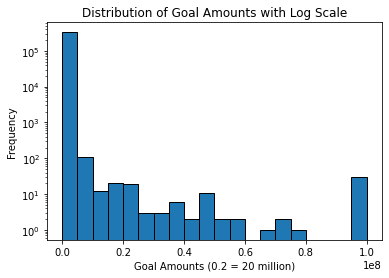

In [72]:
#plot histogram to understand distribution and find outliers
plt.hist(df['goal'], bins=20, log=True, edgecolor='black')
plt.xlabel('Goal Amounts (0.2 = 20 million)')
plt.ylabel('Frequency')
plt.title('Distribution of Goal Amounts with Log Scale')
plt.show()

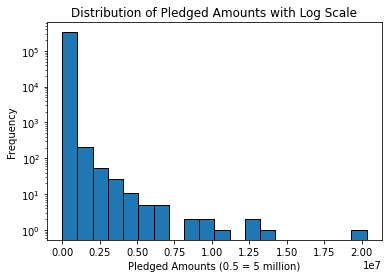

In [73]:
plt.hist(df['pledged'], bins=20, log=True, edgecolor='black')
plt.xlabel('Pledged Amounts (0.5 = 5 million)')
plt.ylabel('Frequency')
plt.title('Distribution of Pledged Amounts with Log Scale')
plt.show()

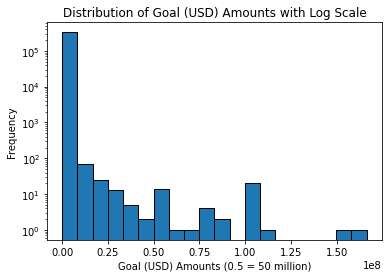

In [74]:
plt.hist(df['usd_goal_real'], bins=20, log=True, edgecolor='black')
plt.xlabel('Goal (USD) Amounts (0.5 = 50 million)')
plt.ylabel('Frequency')
plt.title('Distribution of Goal (USD) Amounts with Log Scale')
plt.xticks()
plt.show()

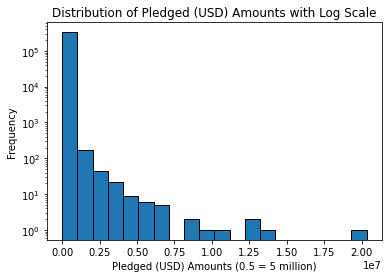

In [75]:
plt.hist(df['usd_pledged_real'], bins=20, log=True, edgecolor='black')
plt.xlabel('Pledged (USD) Amounts (0.5 = 5 million)')
plt.ylabel('Frequency')
plt.title('Distribution of Pledged (USD) Amounts with Log Scale')
plt.show()

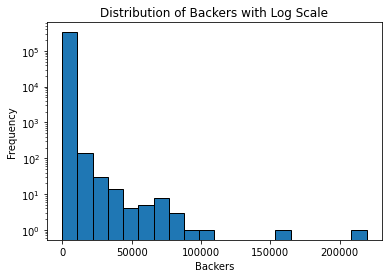

In [76]:
plt.hist(df['backers'], bins=20, log=True, edgecolor='black')
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Distribution of Backers with Log Scale')
plt.show()

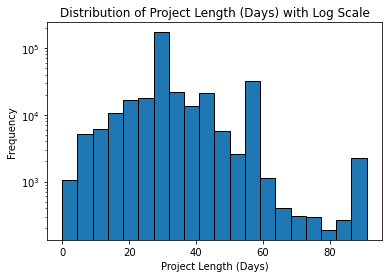

In [77]:
plt.hist(df['length_of_project_days'], bins=20, log=True, edgecolor='black')
plt.xlabel('Project Length (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Project Length (Days) with Log Scale')
plt.show()

<AxesSubplot:>

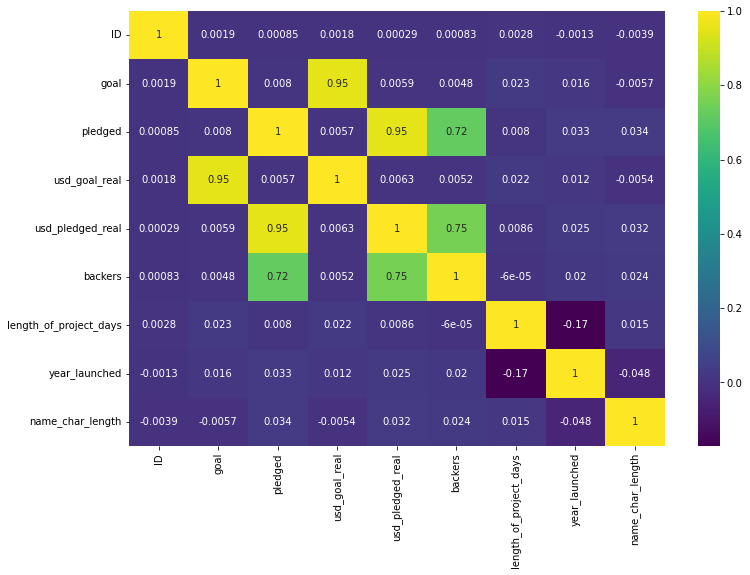

In [166]:
#correlation matrix to view how strongly the variables correlate with eachother
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [78]:
#analyzing success rate of each main category
success_rate_by_category = df.groupby('main_category')['project_result'].value_counts(normalize=True).unstack()
success_rate_by_category = success_rate_by_category['successful']
success_rate_by_category

main_category
Art             0.448865
Comics          0.591415
Crafts          0.270530
Dance           0.654352
Design          0.415898
Fashion         0.282846
Film & Video    0.417876
Food            0.275914
Games           0.438920
Journalism      0.243973
Music           0.526299
Photography     0.341108
Publishing      0.347330
Technology      0.237854
Theater         0.638024
Name: successful, dtype: float64

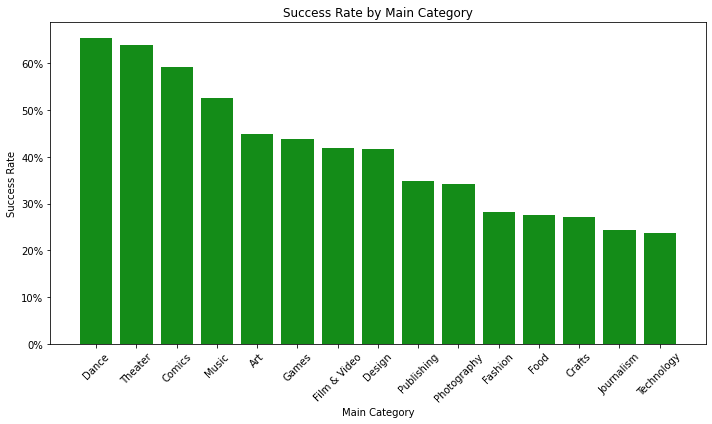

In [105]:
#bar graph showing success rates of main categories sorted from high to low
success_rate_by_category_sorted = success_rate_by_category.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(success_rate_by_category_sorted.index, success_rate_by_category_sorted, color = ('#148c18'))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.title('Success Rate by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
#extracted both successful and failed rates
#made pivot table to showcase
success_fail_rate_by_cat = df.groupby('main_category')['project_result'].value_counts(normalize=True).unstack()
success_fail_rate_by_cat

project_result,failed,successful
main_category,,
Art,0.551135,0.448865
Comics,0.408585,0.591415
Crafts,0.729470,0.270530
Dance,0.345648,0.654352
Design,0.584102,0.415898
Fashion,0.717154,0.282846
Film & Video,0.582124,0.417876
Food,0.724086,0.275914
Games,0.561080,0.438920


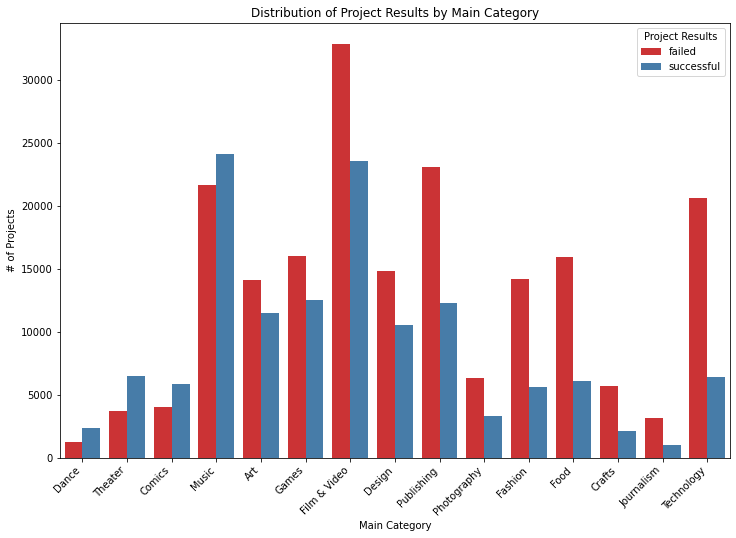

In [81]:
#main categories placed in same order as success rate bar graph above
#paints a clearer context of their success rates
custom_order = ['Dance', 'Theater', 'Comics', 'Music', 'Art', 'Games', 'Film & Video', 
                'Design', 'Publishing', 'Photography', 'Fashion', 'Food', 'Crafts', 'Journalism', 'Technology']

plt.figure(figsize=(12, 8))
sns.countplot(x='main_category', hue='project_result', data=df, palette='Set1', order=custom_order)
plt.xlabel('Main Category')
plt.ylabel('# of Projects')
plt.title('Distribution of Project Results by Main Category')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Project Results', loc='upper right')
plt.show()

In [82]:
#analyzing success rate of main categories by year
success_rate_by_category_year = df.groupby(['main_category', 'year_launched'])['project_result'] \
                                    .apply(lambda x: (x == 'successful').mean()) \
                                    .unstack()

success_rate_by_category_year

year_launched,2009,2010,2011,2012,2013,2014,2015,2016,2017
main_category,,,,,,,,,
Art,0.523810,0.500000,0.548179,0.520763,0.516882,0.386852,0.357337,0.406512,0.489244
Comics,0.545455,0.458333,0.495379,0.500914,0.581467,0.569049,0.569301,0.644915,0.689655
Crafts,0.363636,0.380000,0.425926,0.420000,0.471239,0.218966,0.229795,0.256722,0.305513
Dance,0.428571,0.666667,0.760814,0.741935,0.732075,0.616418,0.506045,0.639024,0.625767
Design,0.307692,0.442308,0.377972,0.446271,0.443777,0.372426,0.358570,0.431408,0.491950
Fashion,0.166667,0.279221,0.354286,0.290387,0.360260,0.259141,0.237671,0.259239,0.331700
Film & Video,0.417508,0.441247,0.456384,0.430578,0.457581,0.410845,0.349430,0.395861,0.410168
Food,0.653846,0.497925,0.447917,0.400000,0.447966,0.239288,0.213142,0.234162,0.261347
Games,0.560976,0.334928,0.395543,0.387084,0.440959,0.410172,0.385060,0.463934,0.527660


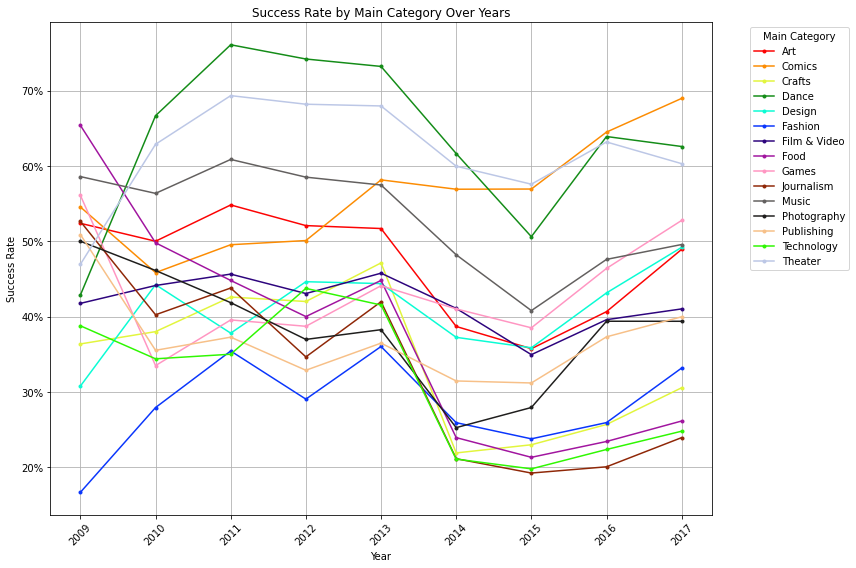

In [108]:
#line graph of success rates of main categories historically
custom_colors = ['#fc0303', '#fc8c03', '#e2f53d', '#148c18', '#0afcd4',
                 '#0a36fc', '#2d047d', '#a1159f', '#ff96c2', '#8f2707',
                 '#63605f', '#1f1e1d', '#f7c088', '#2ff702', '#bcc7e6']

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)


plt.figure(figsize=(12, 8))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

for category in success_rate_by_category_year.index:
    plt.plot(success_rate_by_category_year.loc[category], label=category, marker=('.'))

plt.title('Success Rate by Main Category Over Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

day_launched     Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
main_category                                                                
Art            0.441562  0.454324   0.463323  0.455996  0.437805  0.417884   
Comics         0.628234  0.598890   0.607399  0.563877  0.571620  0.560818   
Crafts         0.241354  0.275928   0.271211  0.279697  0.266776  0.282738   
Dance          0.661448  0.683507   0.635401  0.657534  0.648693  0.618750   
Design         0.420605  0.467152   0.422854  0.400152  0.357806  0.359189   
Fashion        0.284615  0.313514   0.283825  0.279025  0.265018  0.241906   
Film & Video   0.429308  0.428793   0.432230  0.422668  0.403068  0.371350   
Food           0.257923  0.298928   0.267816  0.282909  0.271101  0.263393   
Games          0.436038  0.498660   0.427263  0.419402  0.429913  0.387623   
Journalism     0.255814  0.253485   0.238571  0.253799  0.220820  0.234957   
Music          0.535166  0.536170   0.533450  0.532441  0.517910

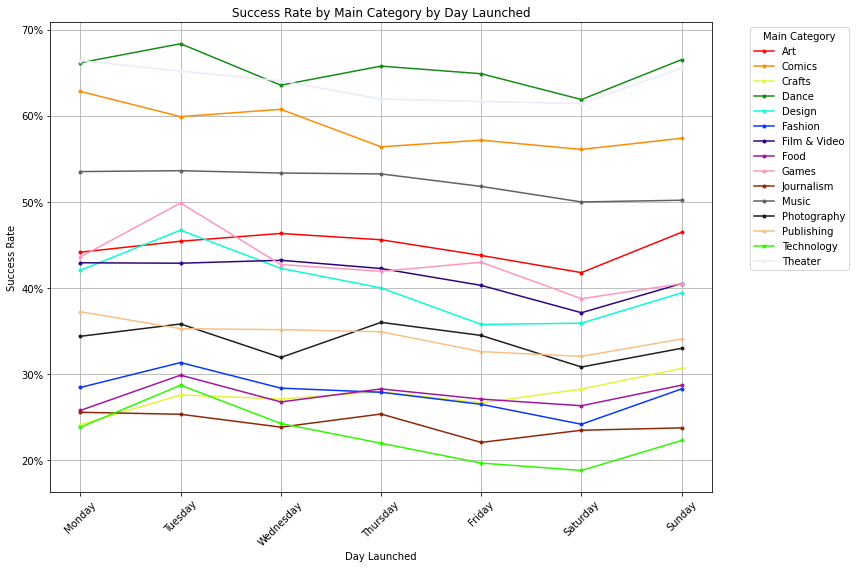

In [109]:
#analyzing success rates of main categories by day of the week
custom_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

success_rate_by_category_day = df.groupby(['main_category', 'day_launched'])['project_result'] \
                                    .apply(lambda x: (x == 'successful').mean()) \
                                    .unstack()

success_rate_by_category_day = success_rate_by_category_day[custom_day_order]

print(success_rate_by_category_day)

#line graph of success rates of main categories by day of the week
custom_colors = ['#fc0303', '#fc8c03', '#e2f53d', '#148c18', '#0afcd4',
                 '#0a36fc', '#2d047d', '#a1159f', '#ff96c2', '#8f2707',
                 '#63605f', '#1f1e1d', '#f7c088', '#2ff702', '#e8edfa']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

plt.figure(figsize=(12, 8))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

sns.countplot(x='main_category', data=df, order=custom_day_order)

for category in success_rate_by_category_day.index:
    plt.plot(success_rate_by_category_day.loc[category], label=category, marker=('.'))

plt.title('Success Rate by Main Category by Day Launched')
plt.xlabel('Day Launched')
plt.ylabel('Success Rate')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

month_launched   January  February     March     April       May      June  \
main_category                                                                
Art             0.415195  0.428021  0.493388  0.497255  0.463330  0.482065   
Comics          0.602620  0.631043  0.616684  0.576230  0.582876  0.557979   
Crafts          0.270736  0.262215  0.291492  0.273038  0.287770  0.275685   
Dance           0.609562  0.693878  0.672566  0.676796  0.650888  0.676375   
Design          0.392123  0.416526  0.413591  0.426449  0.390485  0.408593   
Fashion         0.248797  0.270007  0.280190  0.294041  0.295510  0.269165   
Film & Video    0.403154  0.460529  0.451344  0.434591  0.403662  0.399923   
Food            0.245153  0.285227  0.323733  0.319735  0.309218  0.288125   
Games           0.442365  0.443526  0.453232  0.448078  0.445618  0.436714   
Journalism      0.242038  0.226190  0.243243  0.281525  0.238245  0.271429   
Music           0.530324  0.544252  0.534845  0.524215  0.520728

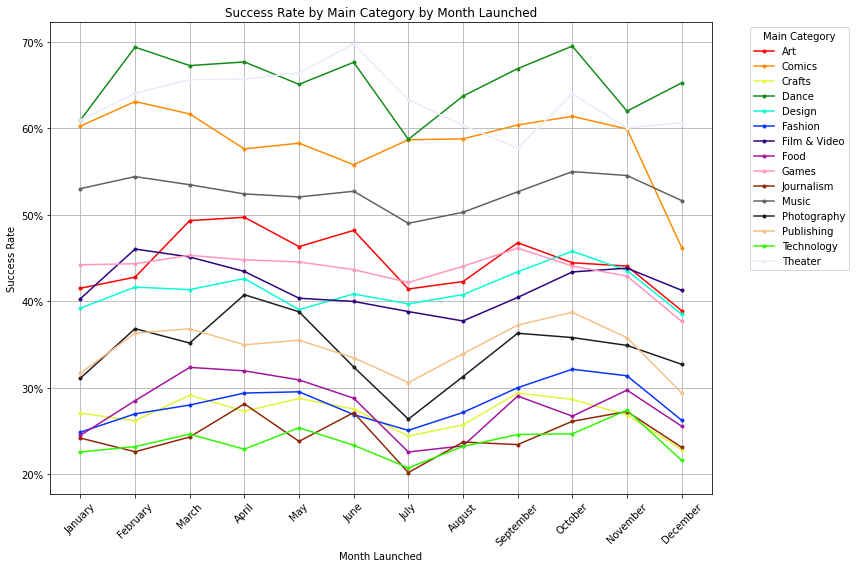

In [110]:
#analyzing success rates of main categories by month
custom_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

success_rate_by_category_month = df.groupby(['main_category', 'month_launched'])['project_result'] \
                                    .apply(lambda x: (x == 'successful').mean()) \
                                    .unstack()

success_rate_by_category_month = success_rate_by_category_month.reindex(columns=custom_month_order)

print(success_rate_by_category_month)

custom_colors = ['#fc0303', '#fc8c03', '#e2f53d', '#148c18', '#0afcd4',
                 '#0a36fc', '#2d047d', '#a1159f', '#ff96c2', '#8f2707',
                 '#63605f', '#1f1e1d', '#f7c088', '#2ff702', '#e8edfa']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

plt.figure(figsize=(12, 8))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

sns.countplot(x='main_category', data=df, order=custom_month_order)

for category in success_rate_by_category_month.index:
    plt.plot(success_rate_by_category_month.loc[category], label=category, marker=('.'))

plt.title('Success Rate by Main Category by Month Launched')
plt.xlabel('Month Launched')
plt.ylabel('Success Rate')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [112]:
#success rates of projects by the day of the week launched
success_rate_by_day_launched = df.groupby('day_launched')['project_result'].value_counts(normalize=True).unstack()

success_rate_by_day_launched = success_rate_by_day_launched['successful']

success_rate_by_day_launched

day_launched
Friday       0.387849
Monday       0.406658
Saturday     0.374536
Sunday       0.404324
Thursday     0.402193
Tuesday      0.425123
Wednesday    0.406135
Name: successful, dtype: float64

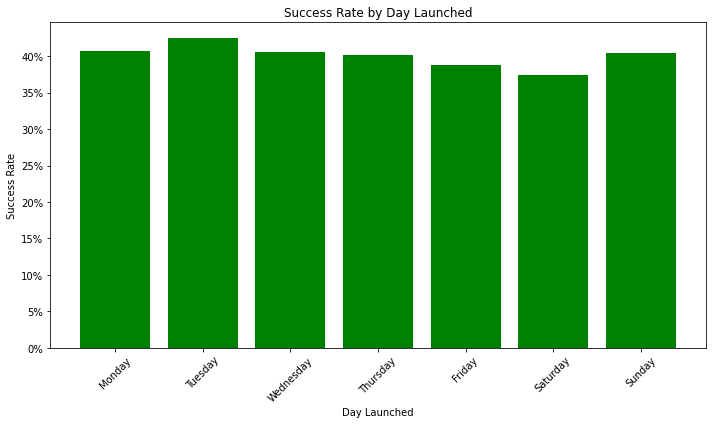

In [113]:
#bar graph of success rate by day of the week
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_sorted = df.sort_values(by='day_launched', key=lambda x: x.map({day: i for i, day in enumerate(desired_order)}))

success_rate_by_day_launched_sorted = success_rate_by_day_launched.reindex(desired_order)

plt.figure(figsize=(10, 6))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

plt.bar(success_rate_by_day_launched_sorted.index, success_rate_by_day_launched_sorted, color='green')

plt.title('Success Rate by Day Launched')
plt.xlabel('Day Launched')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
#success rates of projects by month launched
success_rate_by_month_launched = df.groupby('month_launched')['project_result'].value_counts(normalize=True).unstack()

success_rate_by_month_launched = success_rate_by_month_launched['successful']

success_rate_by_month_launched

month_launched
April        0.422958
August       0.380919
December     0.370599
February     0.418773
January      0.388334
July         0.364954
June         0.406323
March        0.426626
May          0.413346
November     0.412918
October      0.420426
September    0.409801
Name: successful, dtype: float64

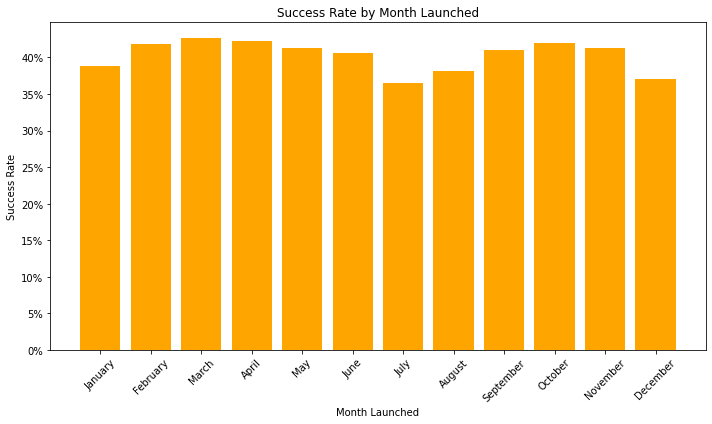

In [115]:
#bar graph of success rate by month
desired_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']

df_month_sorted = df.sort_values(by='month_launched', key=lambda x: x.map({month: i for i, month in enumerate(desired_month_order)}))

success_rate_by_month_launched_sorted = success_rate_by_month_launched.reindex(desired_month_order)

plt.figure(figsize=(10, 6))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

plt.bar(success_rate_by_month_launched_sorted.index, success_rate_by_month_launched_sorted, color='orange')

plt.title('Success Rate by Month Launched')
plt.xlabel('Month Launched')
plt.ylabel('Success Rate')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [116]:
#success rate by length of project in days
success_rate_by_length_of_project_days = df.groupby('length_of_project_days')['project_result'].value_counts(normalize=True).unstack()


success_rate_by_length_of_project_days = success_rate_by_length_of_project_days['successful']

success_rate_by_length_of_project_days

length_of_project_days
0     0.380435
1     0.426357
2     0.360825
3     0.425641
4     0.434978
        ...   
87    0.342857
88    0.362434
89    0.326923
90    0.310112
91    0.227273
Name: successful, Length: 92, dtype: float64

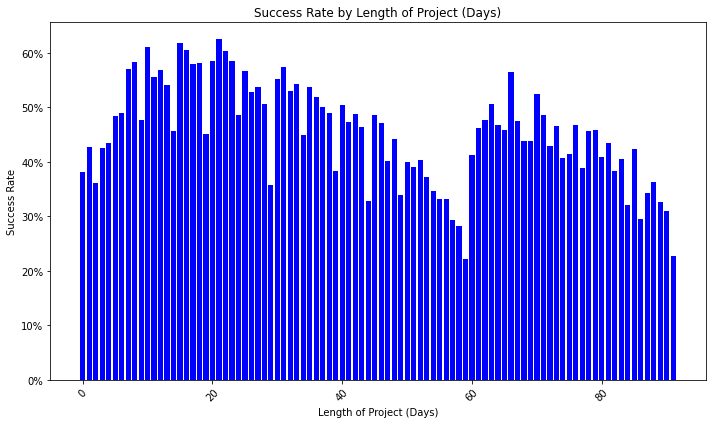

In [117]:
#bar graph of success rates of length of project in days
success_rate_by_length_of_project_days_sorted = success_rate_by_length_of_project_days.sort_values(ascending=False)

plt.figure(figsize=(10, 6))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

plt.bar(success_rate_by_length_of_project_days_sorted.index, success_rate_by_length_of_project_days_sorted, color = ('blue'))

plt.title('Success Rate by Length of Project (Days)')
plt.xlabel('Length of Project (Days)')
plt.ylabel('Success Rate')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Length of Project (in days)')

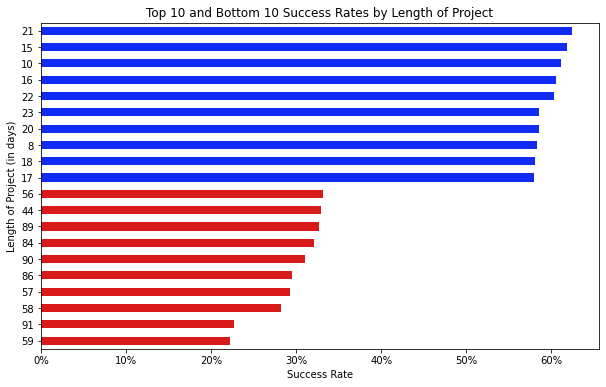

In [135]:
#horizontal bar graph for top 10 and bottom 10 success rates by name length in chracters
top_10_success_rates_len_days = success_rate_by_length_of_project_days.sort_values(ascending=False).head(10)

bottom_10_success_rates_len_days = success_rate_by_length_of_project_days.sort_values(ascending=True).head(10)

combined_success_rates_len_days = pd.concat([top_10_success_rates_len_days, bottom_10_success_rates_len_days])

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
combined_success_rates_len_days.sort_values().plot(kind='barh', color=['#d91a1a'] * 10 + ['#112bf2'] * 10) 
plt.title('Top 10 and Bottom 10 Success Rates by Length of Project')
plt.xlabel('Success Rate')
plt.ylabel('Length of Project (in days)')

In [120]:
#success rate by country
success_rate_by_country = df.groupby('country')['project_result'].value_counts(normalize=True).unstack()

success_rate_by_country = success_rate_by_country['successful']

success_rate_by_country

country
Australia         0.303809
Austria           0.220619
Belgium           0.290631
Canada            0.334196
Denmark           0.388769
France            0.360317
Germany           0.272489
Hong Kong         0.452830
Ireland           0.303075
Italy             0.185310
Japan             0.304348
Luxembourg        0.333333
Mexico            0.280652
Netherlands       0.255910
New Zealand       0.351648
Norway            0.278351
Singapore         0.392070
Spain             0.262680
Sweden            0.337309
Switzerland       0.286810
United Kingdom    0.409704
United States     0.418191
Name: successful, dtype: float64

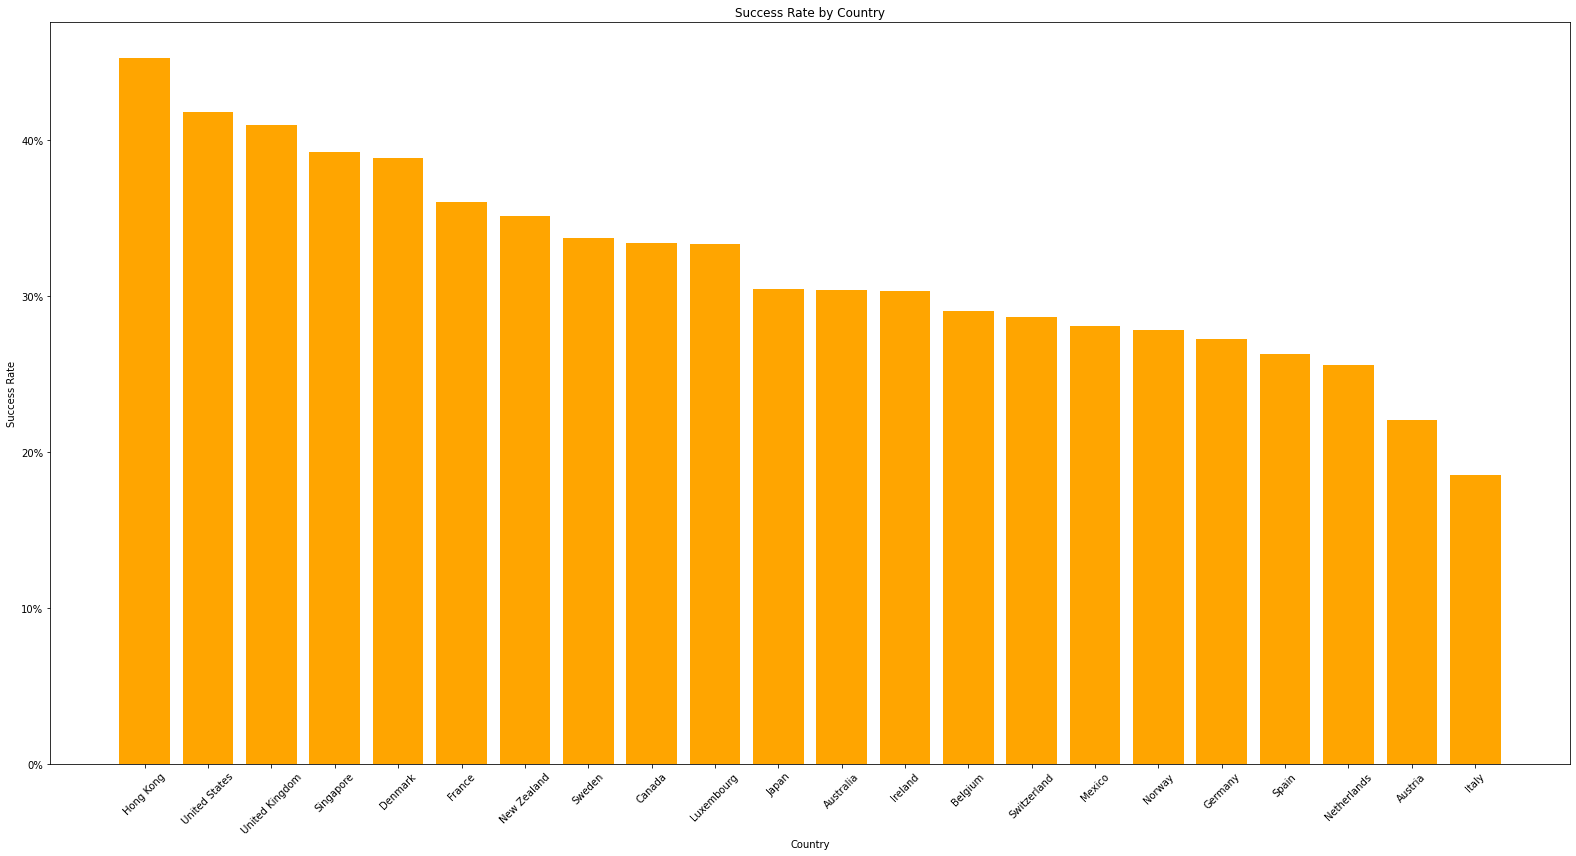

In [129]:
#success rates by countries, sorted from high to low
success_rate_by_country_sorted = success_rate_by_country.sort_values(ascending=False)

plt.figure(figsize=(22, 12))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

plt.bar(success_rate_by_country_sorted.index, success_rate_by_country_sorted, color = ('orange'))

plt.title('Success Rate by Country')
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [133]:
#individually analyzing the success rates of main categories for each country
pivot_table_sr_cat_country = pd.DataFrame()

for country in countries:

    df_country = df[df['country'] == country]

    success_rate_by_category_country = df_country.groupby('main_category')['project_result'] \
                                                .apply(lambda x: (x == 'successful').mean())

    pivot_table_sr_cat_country[country] = success_rate_by_category_country

pivot_table_sr_cat_country.fillna(0, inplace=True)

print(pivot_table_sr_cat_country)


               United States  United Kingdom    Canada  Australia   Germany  \
main_category                                                                 
Art                 0.464345        0.444948  0.346852   0.350785  0.329843   
Comics              0.590759        0.642857  0.617336   0.584337  0.279070   
Crafts              0.275029        0.265743  0.285714   0.238710  0.312500   
Dance               0.677702        0.609848  0.421687   0.517241  0.300000   
Design              0.415526        0.449042  0.404255   0.417437  0.401747   
Fashion             0.283434        0.279310  0.336333   0.245378  0.264069   
Film & Video        0.421488        0.461081  0.339154   0.301703  0.310469   
Food                0.296678        0.211405  0.210291   0.141058  0.118557   
Games               0.462504        0.426194  0.345114   0.362784  0.317992   
Journalism          0.256674        0.243523  0.195652   0.168421  0.092308   
Music               0.539913        0.493783  0.4396

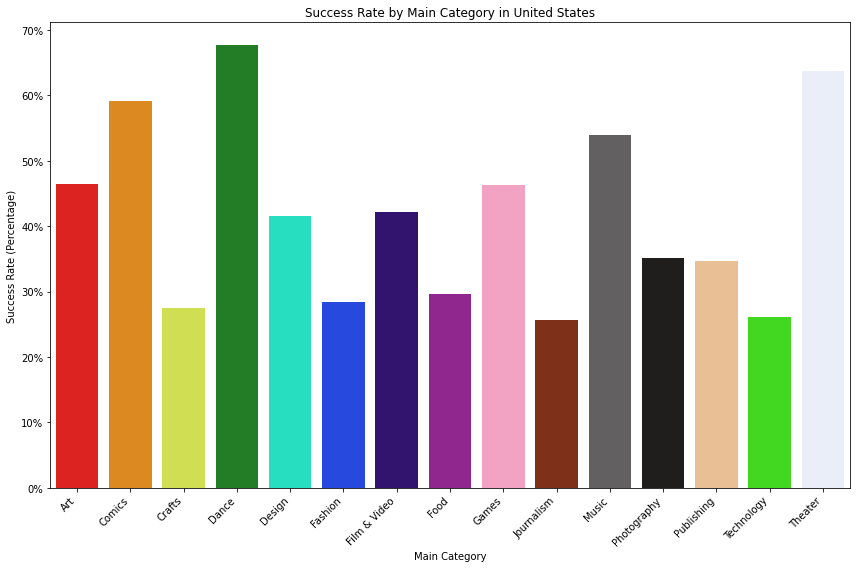

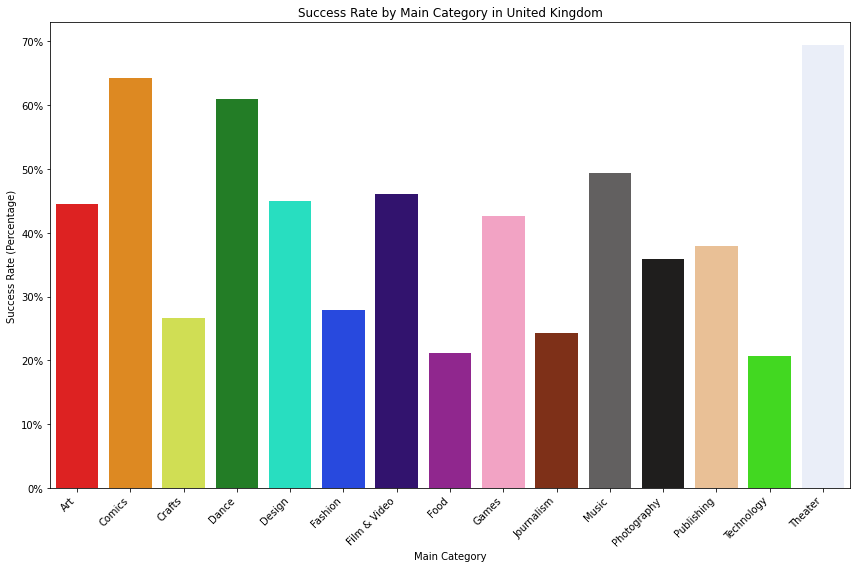

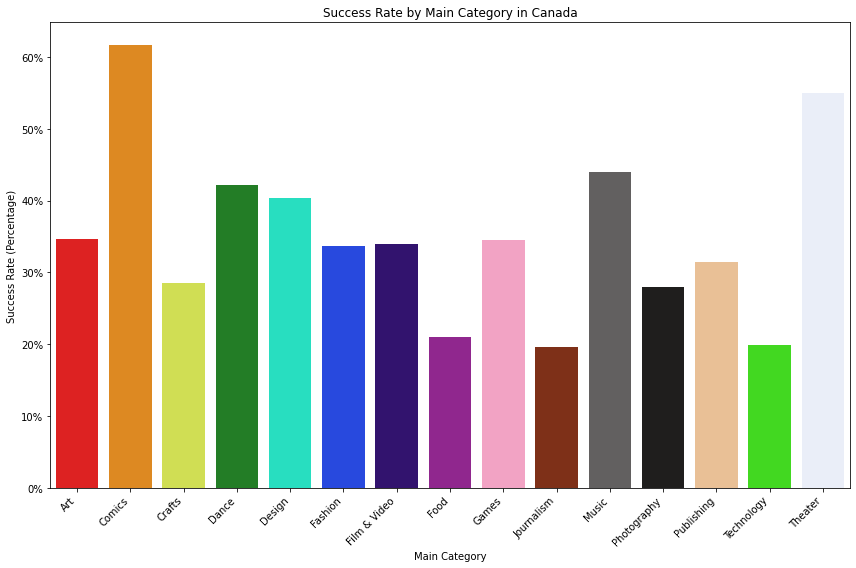

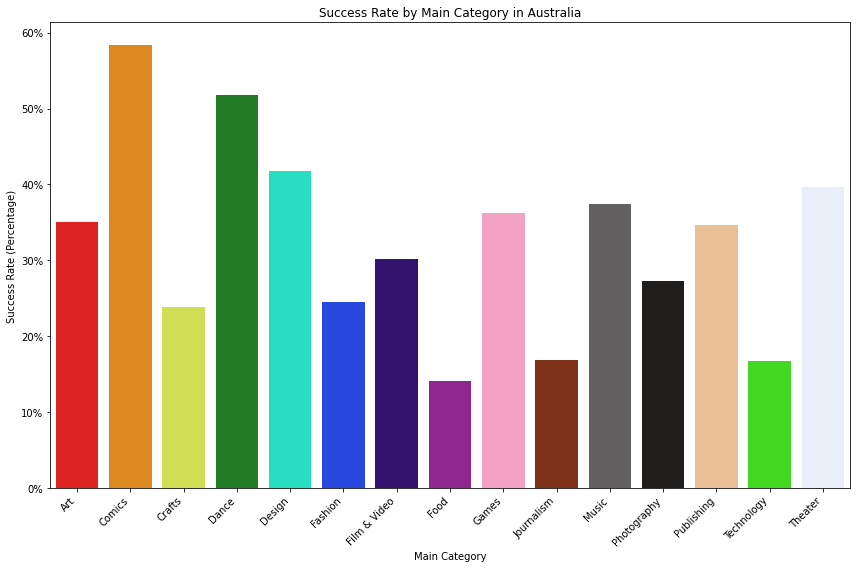

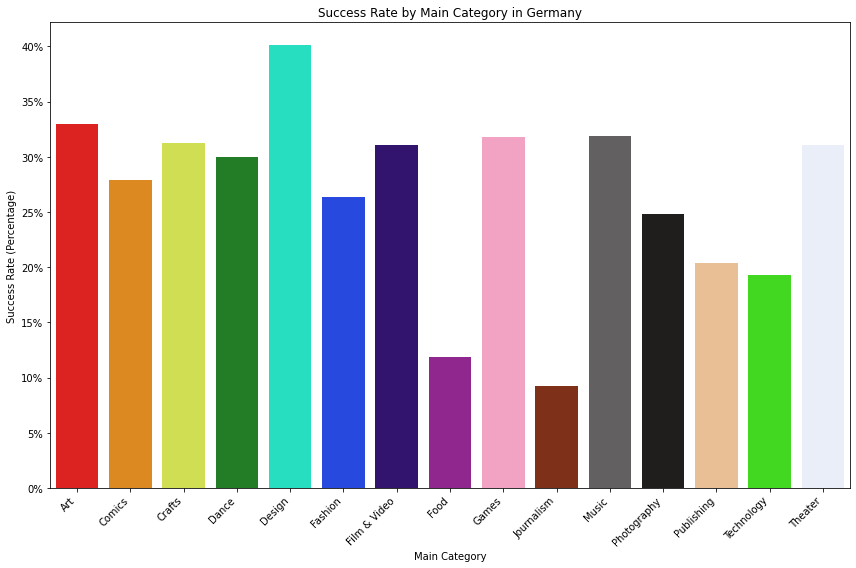

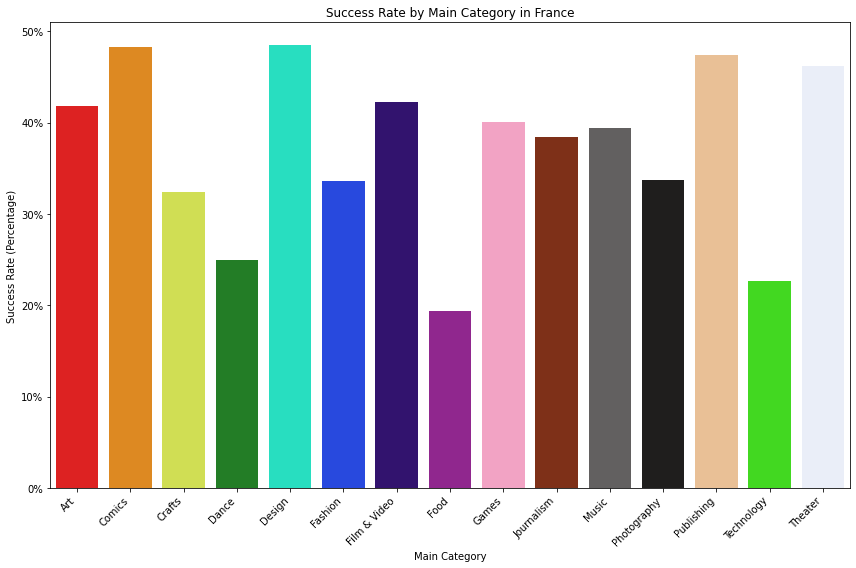

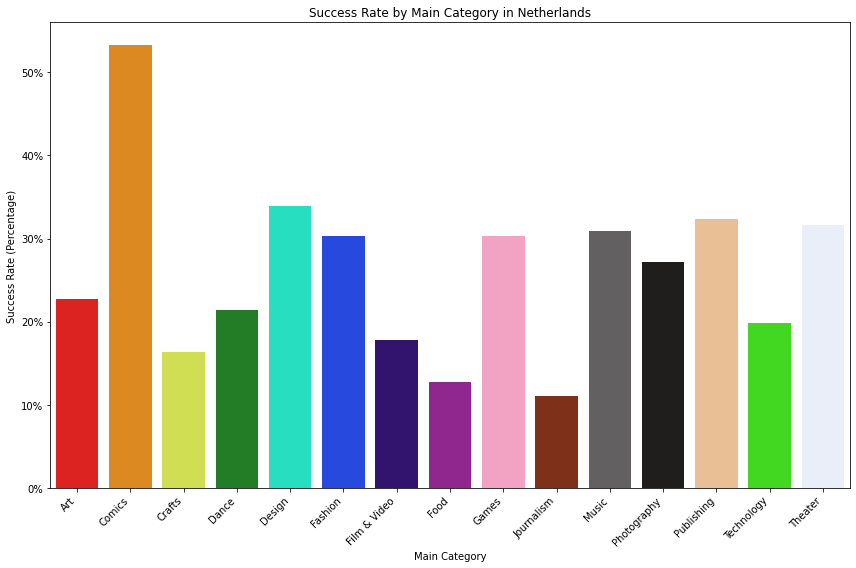

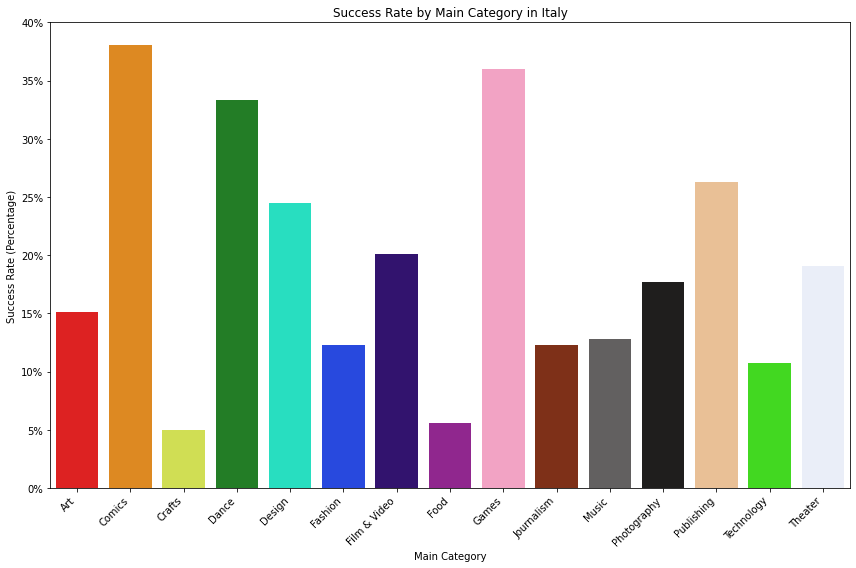

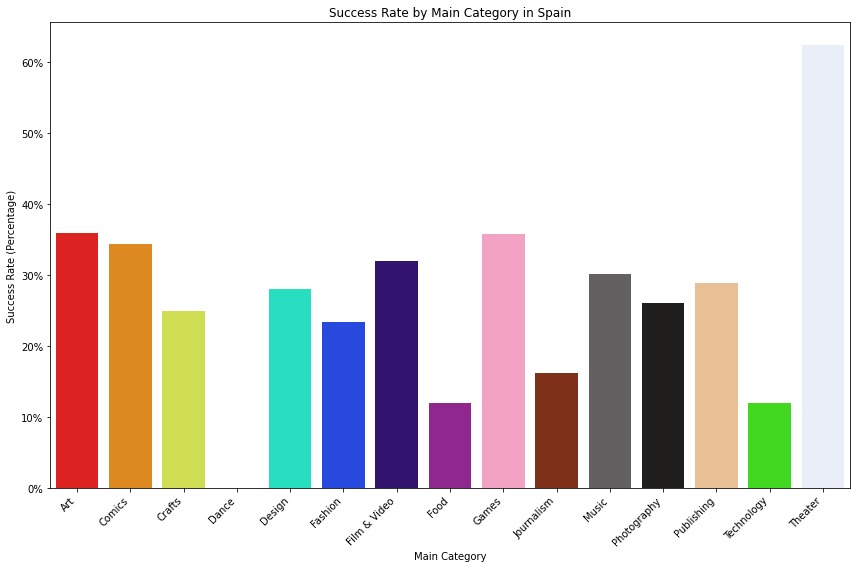

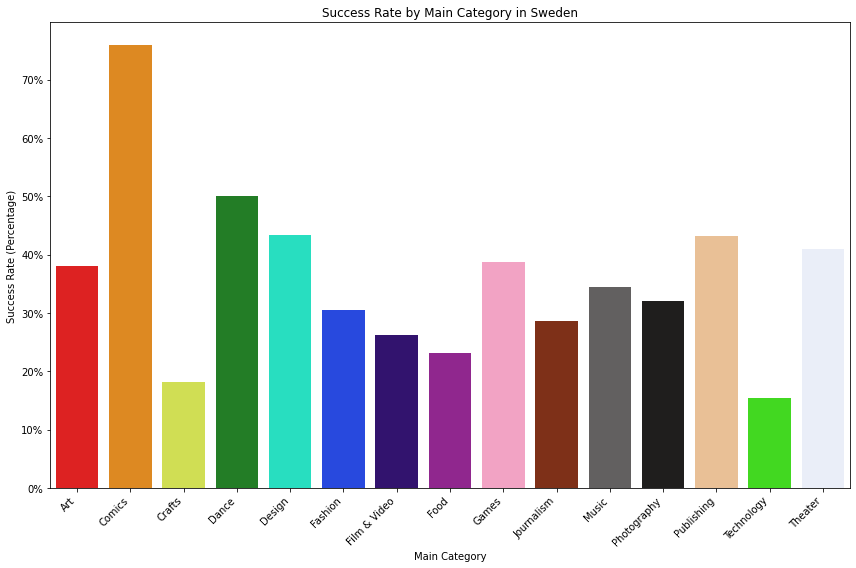

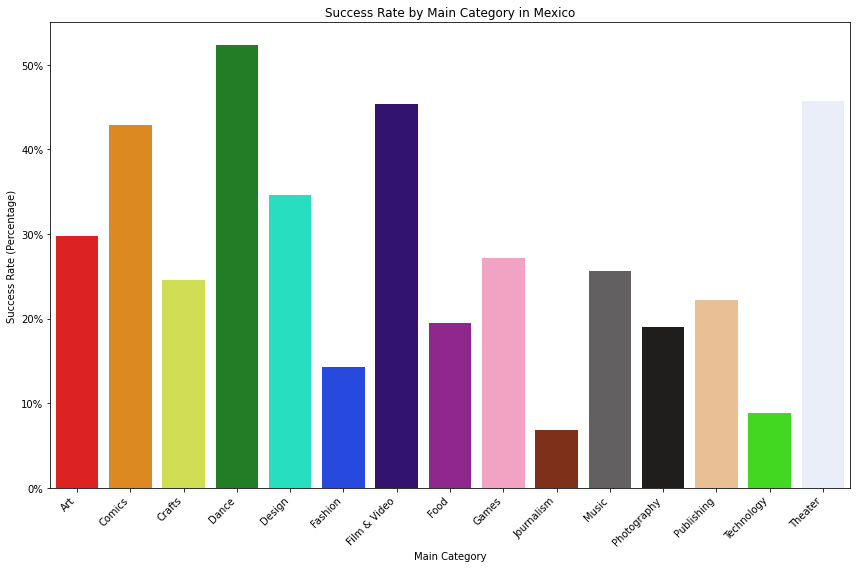

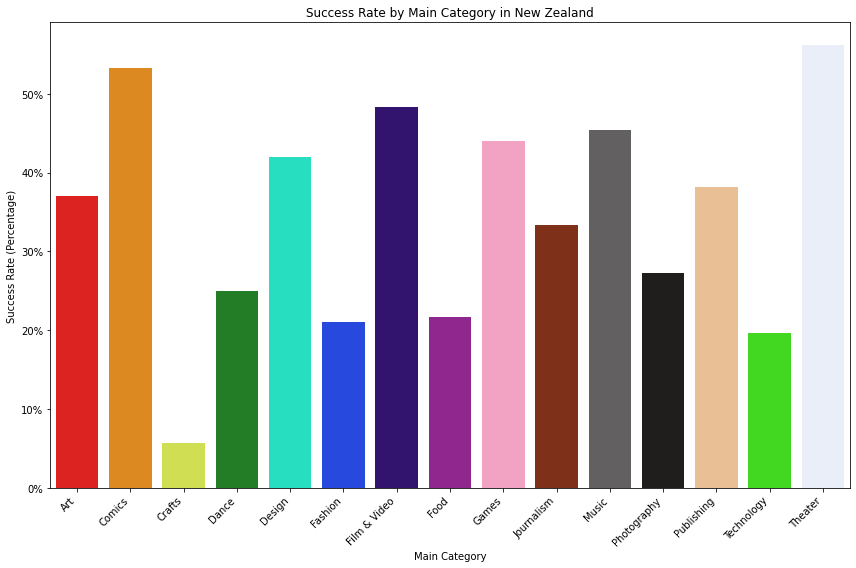

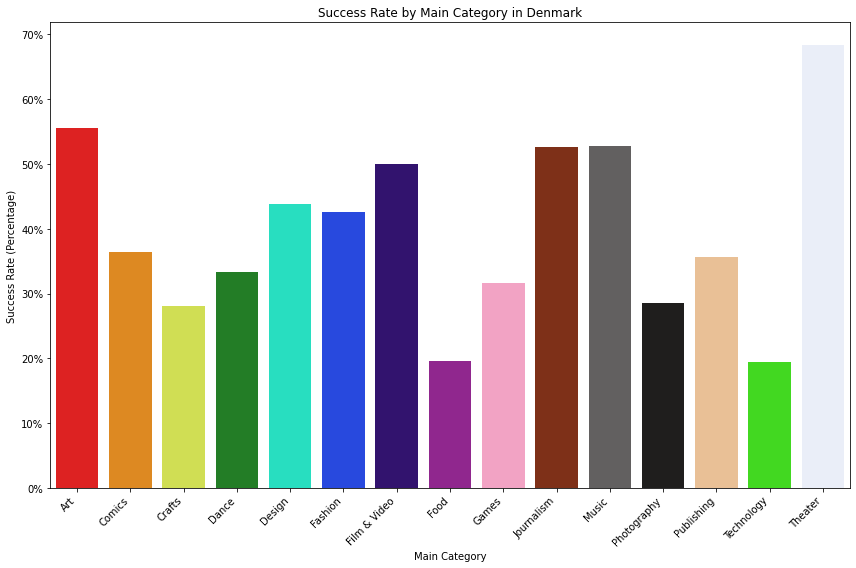

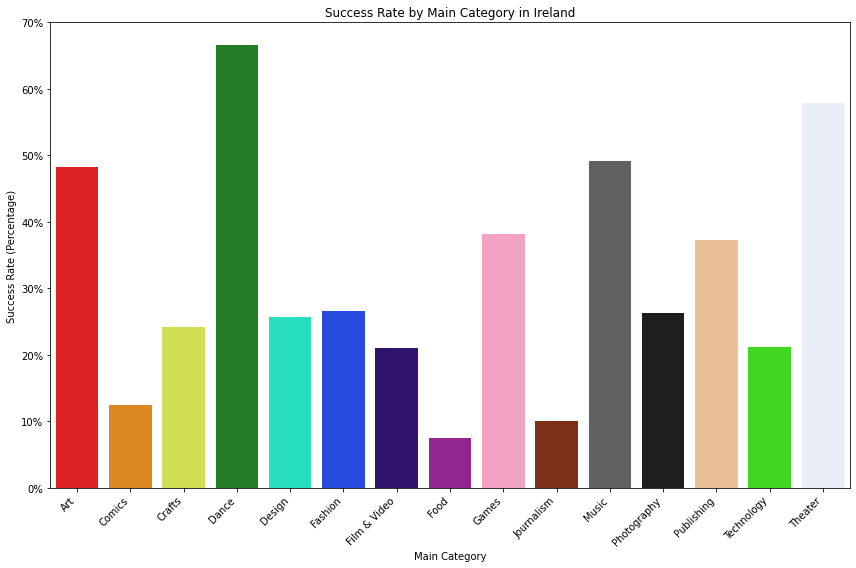

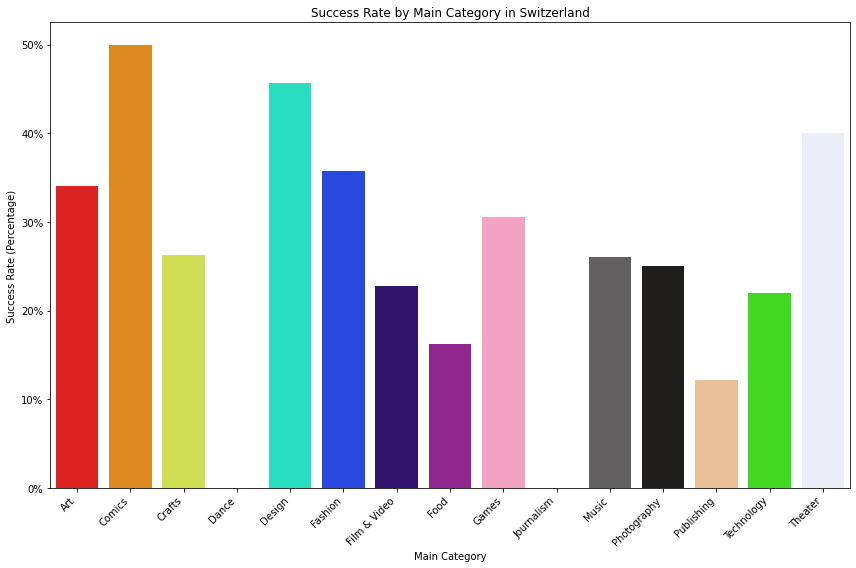

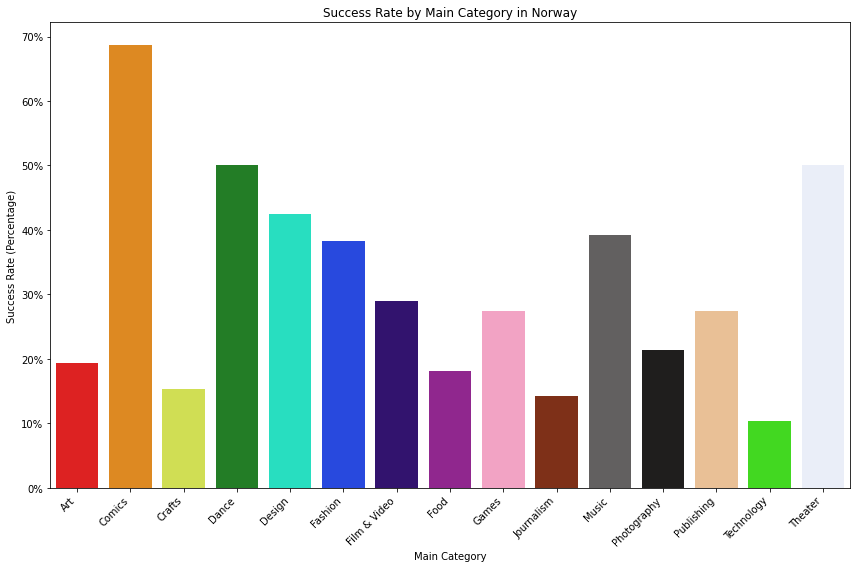

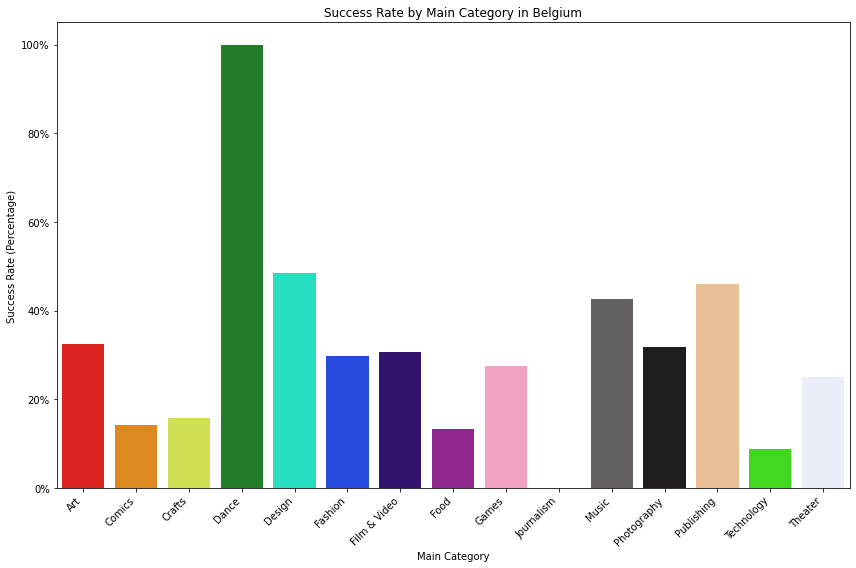

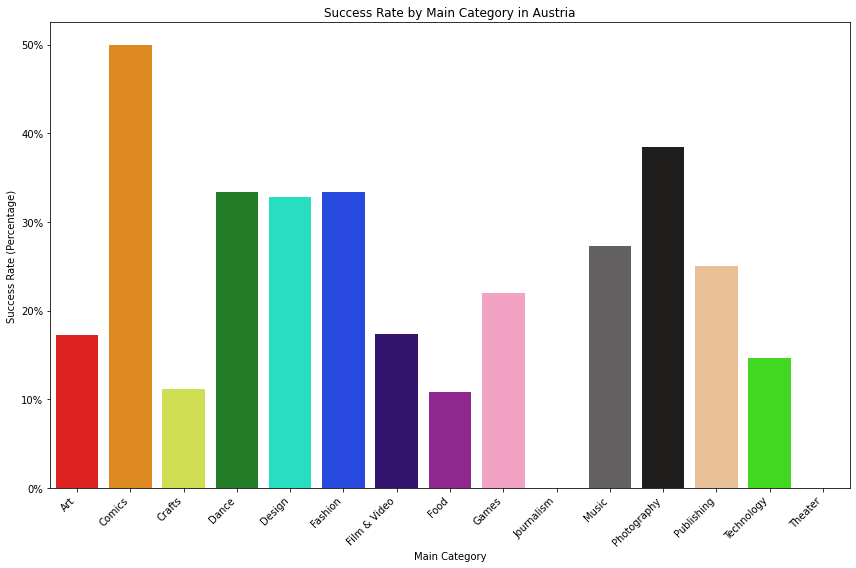

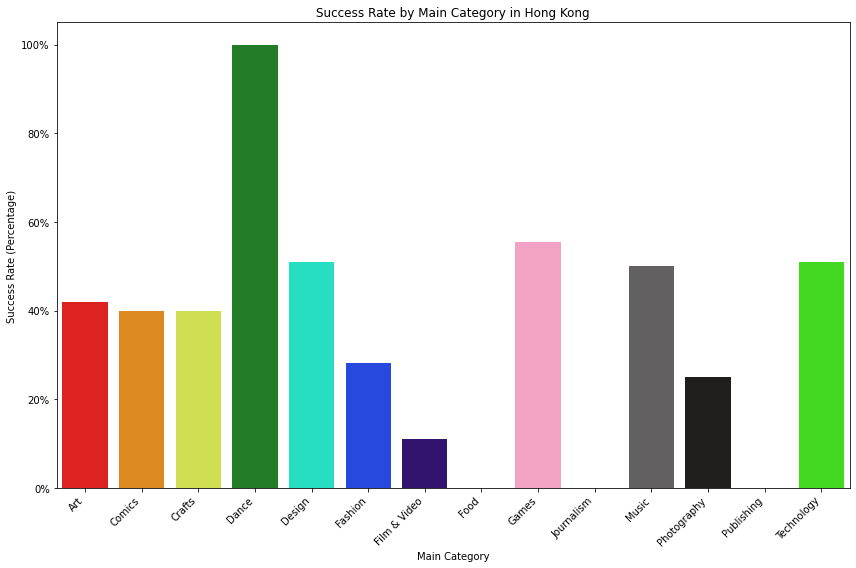

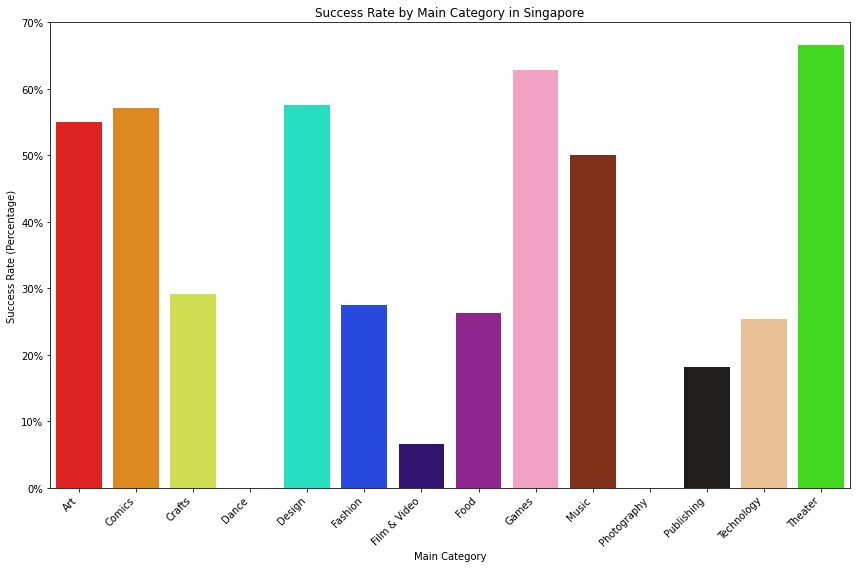

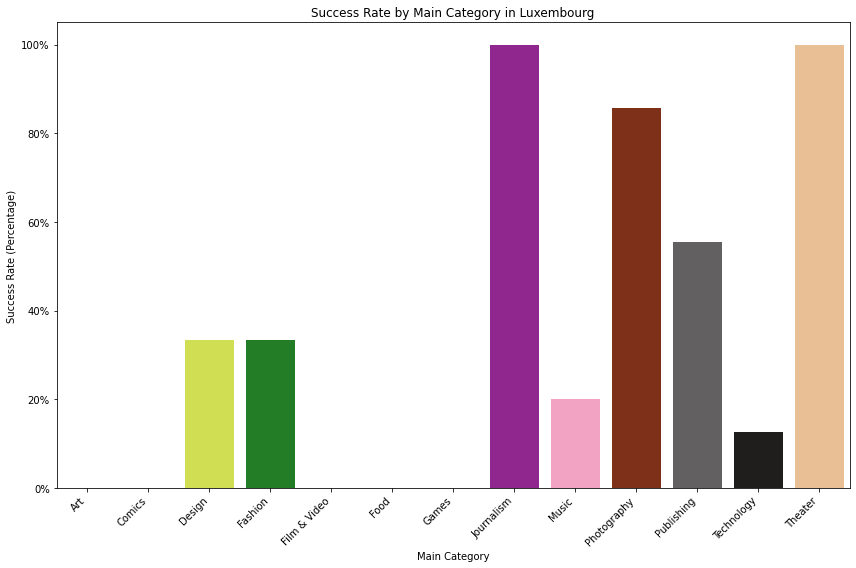

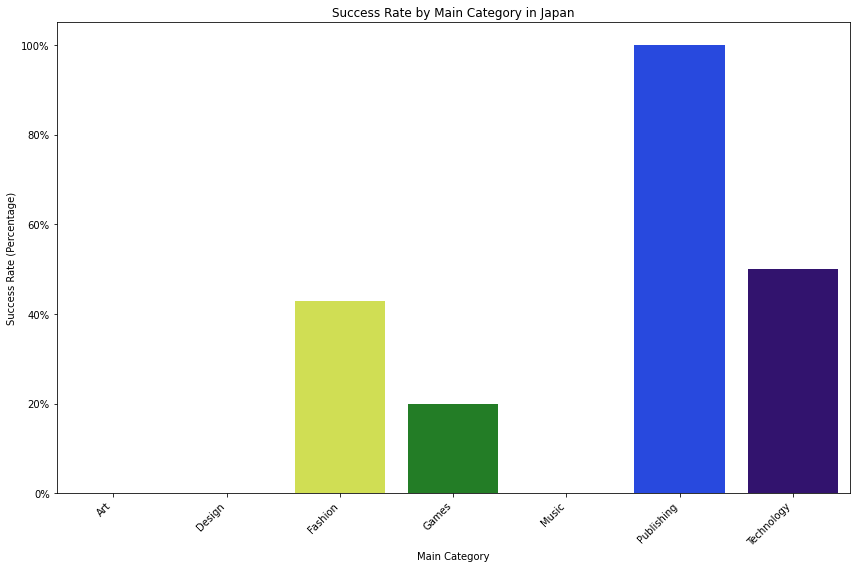

In [122]:
#note: some countries may not have all main categories shown due to no existing\
#data for projects launched in that country
#note: if no bar is graphed for a main category, that means a 0% success rate
countries = ['United States', 'United Kingdom', 'Canada', 'Australia', 'Germany', 'France', 'Netherlands', 'Italy', 'Spain', 
             'Sweden', 'Mexico', 'New Zealand', 'Denmark', 'Ireland', 'Switzerland', 'Norway', 'Belgium', 'Austria', 
             'Hong Kong', 'Singapore', 'Luxembourg', 'Japan']


custom_colors = ['#fc0303', '#fc8c03', '#e2f53d', '#148c18', '#0afcd4',
                 '#0a36fc', '#2d047d', '#a1159f', '#ff96c2', '#8f2707',
                 '#63605f', '#1f1e1d', '#f7c088', '#2ff702', '#e8edfa']

for country in countries:

    df_country = df[df['country'] == country]

    success_rate_by_category_country = df_country.groupby('main_category')['project_result'] \
                                                .apply(lambda x: (x == 'successful').mean())

    plt.figure(figsize=(12, 8))
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    sns.barplot(x=success_rate_by_category_country.index, y=success_rate_by_category_country.values, palette=custom_colors)

    plt.title(f'Success Rate by Main Category in {country}')
    plt.xlabel('Main Category')
    plt.ylabel('Success Rate (Percentage)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [123]:
#created a new column: name_char_length
#created in order to analyze the success rates of the length of project names
df['name_char_length'] = df['project_name'].apply(len)

success_rate_by_name_length = df.groupby('name_char_length')['project_result'].value_counts(normalize=True).unstack()

success_rate_by_name_length = success_rate_by_name_length['successful']

success_rate_by_name_length = success_rate_by_name_length.fillna(0)

print(success_rate_by_name_length)

name_char_length
1     0.142857
2     0.289474
3     0.384615
4     0.399281
5     0.347036
        ...   
81    0.414286
82    0.444444
83    0.446809
84    0.380165
85    0.479532
Name: successful, Length: 85, dtype: float64


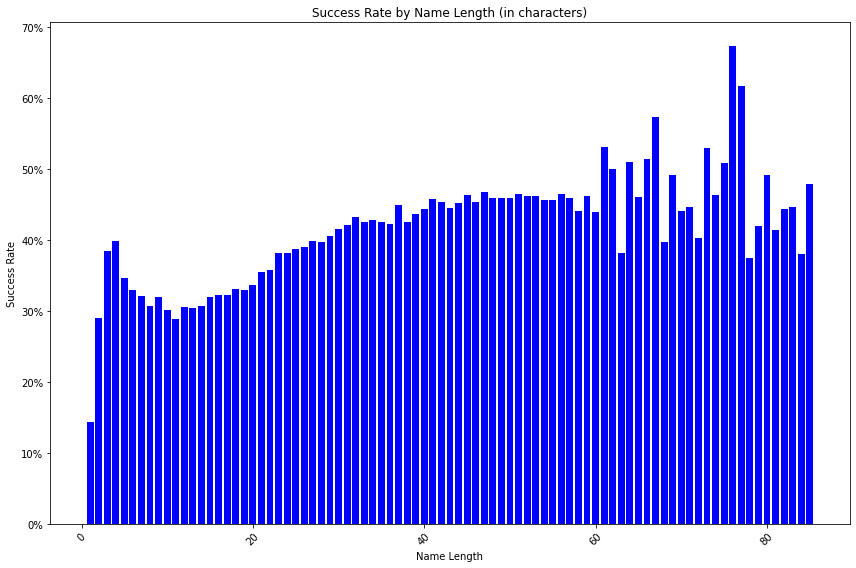

In [124]:
#bar graph of success rates by name length in characters
plt.figure(figsize=(12, 8))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.bar(success_rate_by_name_length.index, success_rate_by_name_length.values, color='blue')

plt.title('Success Rate by Name Length (in characters)')
plt.xlabel('Name Length')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

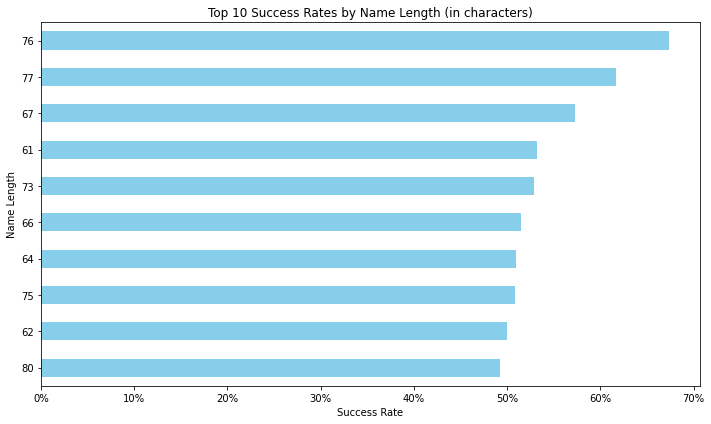

In [127]:
#horizontal bar graph for top 10 success rates by name length in chracters
top_10_success_rates = success_rate_by_name_length.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
top_10_success_rates.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Success Rates by Name Length (in characters)')
plt.xlabel('Success Rate')
plt.ylabel('Name Length')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Name Length (in characters)')

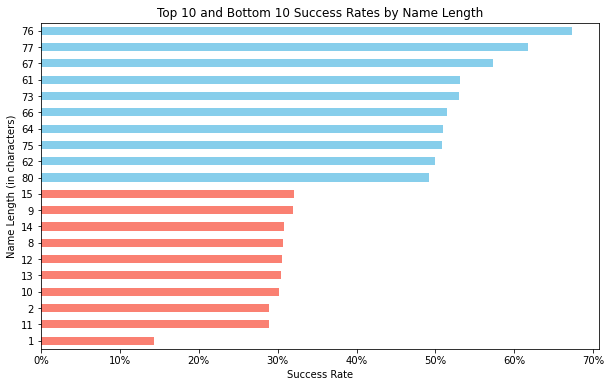

In [134]:
#horizontal bar graph for top 10 and bottom 10 success rates by name length in chracters
top_10_success_rates = success_rate_by_name_length.sort_values(ascending=False).head(10)

bottom_10_success_rates = success_rate_by_name_length.sort_values(ascending=True).head(10)

combined_success_rates = pd.concat([top_10_success_rates, bottom_10_success_rates])

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
combined_success_rates.sort_values().plot(kind='barh', color=['salmon'] * 10 + ['skyblue'] * 10)
plt.title('Top 10 and Bottom 10 Success Rates by Name Length')
plt.xlabel('Success Rate')
plt.ylabel('Name Length (in characters)')